In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import optuna
from optuna.integration import CatBoostPruningCallback, XGBoostPruningCallback
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, make_scorer
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

import tensorflow as tf
keras = tf.keras
from keras.callbacks import EarlyStopping

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


warnings.filterwarnings("ignore")

### MLP

In [2]:
from PrepareData import DataPreparer
path_to_data = r"./Data/"
data_prep = DataPreparer(path = path_to_data, save_to_excel=False,train=True)
data_prep.prepare_data()
data_prep.save_data()

Saving the prepared data to data/prepared_data_train.parquet
Data prepared and saved!


In [3]:
feature_columns =['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'HOME_PLAYERS_PLAYER_DRIBBLED_PAST_season_sum_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_sum_SUM', 'HOME_PLAYERS_PLAYER_PENALTIES_SAVED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_REDCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_BLOCKED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_YELLOWCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_CROSSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_ASSISTS_season_average_SUM', 'HOME_PLAYERS_PLAYER_DUELS_LOST_season_average_SUM', 'HOME_PLAYERS_PLAYER_PASSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_TOTAL_season_average_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_season_std_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_std_SUM', 'HOME_PLAYERS_PLAYER_KEY_PASSES_season_std_SUM', 'AWAY_PLAYERS_PLAYER_BIG_CHANCES_MISSED_season_average_SUM', 'AWAY_PLAYERS_PLAYER_SHOTS_ON_TARGET_season_average_SUM']

In [4]:
from GetData import DataScaler
data_scaler = DataScaler(train=True)
data, _, target_column = data_scaler.get_data()

Removed 13.08% of columns because they have more than 20% of values missing
Removed 16.34% of columns because they have only one value
Removed 44.42% of rows because they have missing values


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[feature_columns])
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
	data[target_column], 
	test_size=0.2, 
	random_state=42,
	stratify=data[target_column],
	shuffle=True
	)

In [6]:
import tensorflow as tf
keras = tf.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l2

In [7]:
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test


# Define feature_columns
feature_columns = X_train.shape[1]  # number of features

def create_model(layer1=160, layer2=896, dropout_rate=0.15, l2_strength=0.001607168503200792, learning_rate=0.00001):
    model = Sequential()
    model.add(Dense(
        layer1, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength), 
        input_dim=feature_columns
    ))
    model.add(Dense(
        layer2, 
        activation='relu', 
        kernel_regularizer=regularizers.l2(l2_strength)
    ))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(3, activation='softmax')) 
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# hyperparams
layer1 = 896
layer2 = 768
dropout_rate = 0.05
l2_strength = 0.016322487249990424


# creation of the model
model = create_model(
    layer1=layer1,
    layer2=layer2,
    dropout_rate=dropout_rate,
    l2_strength=l2_strength
)

# define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')


Epoch 1/20
171/171 - 2s - 14ms/step - accuracy: 0.4399 - loss: 17.6967 - val_accuracy: 0.4846 - val_loss: 17.2517
Epoch 2/20
171/171 - 1s - 7ms/step - accuracy: 0.4872 - loss: 16.8585 - val_accuracy: 0.4868 - val_loss: 16.4516
Epoch 3/20
171/171 - 1s - 7ms/step - accuracy: 0.5046 - loss: 16.0712 - val_accuracy: 0.4868 - val_loss: 15.6883
Epoch 4/20
171/171 - 1s - 7ms/step - accuracy: 0.5101 - loss: 15.3185 - val_accuracy: 0.4868 - val_loss: 14.9594
Epoch 5/20
171/171 - 1s - 7ms/step - accuracy: 0.5101 - loss: 14.6016 - val_accuracy: 0.4876 - val_loss: 14.2615
Epoch 6/20
171/171 - 1s - 8ms/step - accuracy: 0.5132 - loss: 13.9134 - val_accuracy: 0.4868 - val_loss: 13.5952
Epoch 7/20
171/171 - 1s - 7ms/step - accuracy: 0.5139 - loss: 13.2564 - val_accuracy: 0.4839 - val_loss: 12.9567
Epoch 8/20
171/171 - 1s - 7ms/step - accuracy: 0.5192 - loss: 12.6290 - val_accuracy: 0.4868 - val_loss: 12.3481
Epoch 9/20
171/171 - 1s - 7ms/step - accuracy: 0.5234 - loss: 12.0291 - val_accuracy: 0.4912 - 

In [9]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) 
# print(classification_report(y_test, predicted_classes))
len(predicted_classes)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


1368

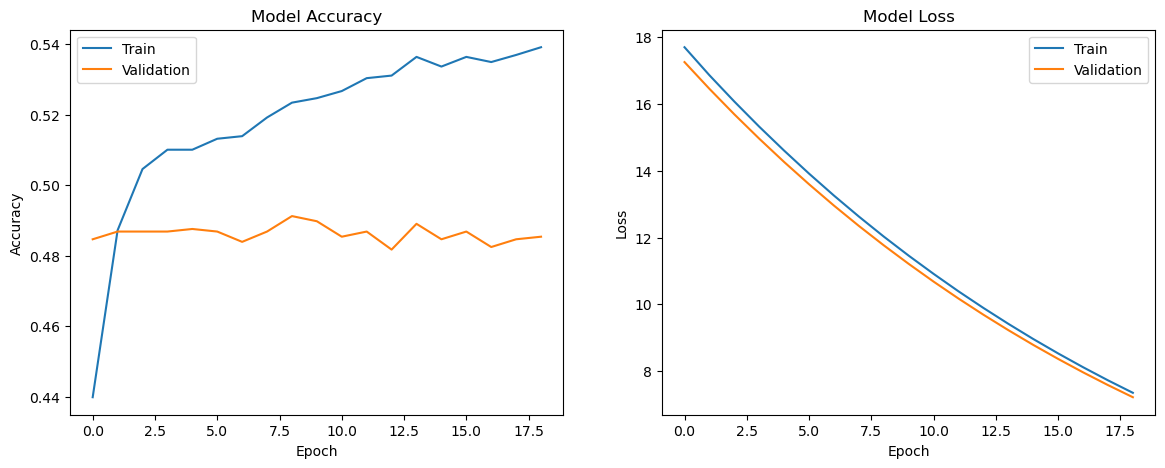

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [11]:
import keras_tuner
feature_columns = X_train.shape[1]
### construction de la fonction pour optimiser les hyperparamètres
def build_model(hp):
    layer1_units = hp.Int('layer1_units', min_value=32, max_value=1024, step=32)
    layer2_units = hp.Int('layer2_units', min_value=32, max_value=1024, step=32)
    l2_strength = hp.Float('l2_strength', min_value=0.001, max_value=0.1, sampling='log')
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.4, default=0.25, step=0.05)
    
    model = Sequential()
    model.add(Dense(layer1_units, activation='relu', kernel_regularizer=regularizers.l2(l2_strength), input_dim=feature_columns))
    model.add(Dense(layer2_units, activation='relu', kernel_regularizer=regularizers.l2(l2_strength)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    max_trials=20,
    objective="val_accuracy",
    executions_per_trial=1,
    overwrite=True,
    directory="data/test_res",
    project_name="ML_QRT",
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Trial 20 Complete [00h 00m 24s]
val_accuracy: 0.48172515630722046

Best val_accuracy So Far: 0.5021929740905762
Total elapsed time: 00h 09m 19s


In [12]:
nmodels = 19
best_hyperparameters = tuner.get_best_hyperparameters(nmodels)
evaluation_results = tuner.oracle.get_best_trials(nmodels)
## pour chacun des modèles, on print les hyperparams et son score de validation
for i, (hyperparameters, trial) in enumerate(zip(best_hyperparameters, evaluation_results)):
    accuracy = trial.score
    print(f"Model {i+1}:")
    print(f"Hyperparameters: {hyperparameters.values}")
    print(f"Score: {round(accuracy, 4)}\n")

Model 1:
Hyperparameters: {'layer1_units': 768, 'layer2_units': 640, 'l2_strength': 0.0551839701446723, 'dropout_rate': 0.0}
Score: 0.5022

Model 2:
Hyperparameters: {'layer1_units': 704, 'layer2_units': 608, 'l2_strength': 0.008446843921252278, 'dropout_rate': 0.30000000000000004}
Score: 0.4993

Model 3:
Hyperparameters: {'layer1_units': 512, 'layer2_units': 576, 'l2_strength': 0.0017316634872800985, 'dropout_rate': 0.05}
Score: 0.4993

Model 4:
Hyperparameters: {'layer1_units': 768, 'layer2_units': 448, 'l2_strength': 0.004239922403447246, 'dropout_rate': 0.1}
Score: 0.4978

Model 5:
Hyperparameters: {'layer1_units': 768, 'layer2_units': 800, 'l2_strength': 0.0075984338632936405, 'dropout_rate': 0.30000000000000004}
Score: 0.4942

Model 6:
Hyperparameters: {'layer1_units': 384, 'layer2_units': 672, 'l2_strength': 0.011779860142648606, 'dropout_rate': 0.0}
Score: 0.4934

Model 7:
Hyperparameters: {'layer1_units': 128, 'layer2_units': 320, 'l2_strength': 0.016069530933482346, 'dropout_

In [15]:
# hyperparams
layer1 = 768
layer2 = 640
dropout_rate = 0.0
l2_strength = 0.0551839701446723


# creation of the model
model = create_model(
    layer1=layer1,
    layer2=layer2,
    dropout_rate=dropout_rate,
    l2_strength=l2_strength
)

# define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

model.fit(
    X_scaled, 
    data[target_column], 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/20
214/214 - 2s - 8ms/step - accuracy: 0.4242 - loss: 49.2453 - val_accuracy: 0.4839 - val_loss: 47.2307
Epoch 2/20
214/214 - 1s - 5ms/step - accuracy: 0.4841 - loss: 45.3662 - val_accuracy: 0.4898 - val_loss: 43.4975
Epoch 3/20
214/214 - 1s - 6ms/step - accuracy: 0.4933 - loss: 41.7629 - val_accuracy: 0.4861 - val_loss: 40.0218
Epoch 4/20
214/214 - 1s - 5ms/step - accuracy: 0.4961 - loss: 38.4065 - val_accuracy: 0.4898 - val_loss: 36.7840
Epoch 5/20
214/214 - 1s - 5ms/step - accuracy: 0.5001 - loss: 35.2804 - val_accuracy: 0.4854 - val_loss: 33.7696
Epoch 6/20
214/214 - 1s - 5ms/step - accuracy: 0.5032 - loss: 32.3705 - val_accuracy: 0.4898 - val_loss: 30.9641
Epoch 7/20
214/214 - 1s - 5ms/step - accuracy: 0.5060 - loss: 29.6626 - val_accuracy: 0.4942 - val_loss: 28.3537
Epoch 8/20
214/214 - 1s - 5ms/step - accuracy: 0.5053 - loss: 27.1436 - val_accuracy: 0.4934 - val_loss: 25.9263
Epoch 9/20
214/214 - 1s - 5ms/step - accuracy: 0.5048 - loss: 24.8020 - val_accuracy: 0.4876 - v

In [16]:
data_prep = DataPreparer(path = path_to_data, save_to_excel=False,train=False)
data_prep.prepare_data()
data_prep.save_data()

Saving the prepared data to data/prepared_data_test.parquet
Data prepared and saved!


In [17]:
feature_columns =['HOME_TEAM_SHOTS_TOTAL_season_sum', 'HOME_TEAM_SHOTS_INSIDEBOX_season_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_sum', 'HOME_TEAM_SHOTS_ON_TARGET_season_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'HOME_TEAM_PASSES_season_sum', 'HOME_TEAM_SUCCESSFUL_PASSES_season_sum', 'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum', 'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_DANGEROUS_ATTACKS_season_sum', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_SHOTS_INSIDEBOX_season_average', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_average', 'HOME_TEAM_PASSES_season_average', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'HOME_TEAM_YELLOWCARDS_season_average', 'HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_std', 'HOME_TEAM_SHOTS_INSIDEBOX_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_season_std', 'HOME_TEAM_SHOTS_ON_TARGET_season_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_season_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'HOME_TEAM_SAVES_season_std', 'HOME_TEAM_CORNERS_season_std', 'HOME_TEAM_BALL_POSSESSION_season_std', 'HOME_TEAM_FOULS_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'HOME_TEAM_OFFSIDES_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_GOALS_season_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_sum', 'HOME_TEAM_SAVES_5_last_match_sum', 'HOME_TEAM_CORNERS_5_last_match_sum', 'HOME_TEAM_YELLOWCARDS_5_last_match_sum', 'HOME_TEAM_ATTACKS_5_last_match_sum', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'HOME_TEAM_PASSES_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_YELLOWCARDS_5_last_match_average', 'HOME_TEAM_SHOTS_TOTAL_5_last_match_std', 'HOME_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'HOME_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_std', 'HOME_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'HOME_TEAM_SAVES_5_last_match_std', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_BALL_POSSESSION_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'HOME_TEAM_ATTACKS_5_last_match_std', 'AWAY_TEAM_SHOTS_TOTAL_season_sum', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_season_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_sum', 'AWAY_TEAM_PASSES_season_sum', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_sum', 'AWAY_TEAM_CORNERS_season_sum', 'AWAY_TEAM_YELLOWCARDS_season_sum', 'AWAY_TEAM_ATTACKS_season_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_sum', 'AWAY_TEAM_SHOTS_TOTAL_season_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_average', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_season_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_YELLOWCARDS_season_average', 'AWAY_TEAM_SHOTS_TOTAL_season_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_season_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_season_std', 'AWAY_TEAM_SHOTS_ON_TARGET_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'AWAY_TEAM_CORNERS_season_std', 'AWAY_TEAM_FOULS_season_std', 'AWAY_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_OFFSIDES_season_std', 'AWAY_TEAM_GOALS_season_std', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_sum', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'AWAY_TEAM_CORNERS_5_last_match_sum', 'AWAY_TEAM_ATTACKS_5_last_match_sum', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_sum', 'AWAY_TEAM_SHOTS_TOTAL_5_last_match_average', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average', 'AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average', 'AWAY_TEAM_SAVES_5_last_match_average', 'AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'AWAY_TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'AWAY_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_PENALTIES_5_last_match_std', 'HOME_PLAYERS_PLAYER_DRIBBLED_PAST_season_sum_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_sum_SUM', 'HOME_PLAYERS_PLAYER_PENALTIES_SAVED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_REDCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_BLOCKED_season_sum_SUM', 'HOME_PLAYERS_PLAYER_YELLOWCARDS_season_sum_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_CROSSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_ASSISTS_season_average_SUM', 'HOME_PLAYERS_PLAYER_DUELS_LOST_season_average_SUM', 'HOME_PLAYERS_PLAYER_PASSES_season_average_SUM', 'HOME_PLAYERS_PLAYER_SHOTS_TOTAL_season_average_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_season_std_SUM', 'HOME_PLAYERS_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_SUM', 'HOME_PLAYERS_PLAYER_HIT_WOODWORK_season_std_SUM', 'HOME_PLAYERS_PLAYER_KEY_PASSES_season_std_SUM', 'AWAY_PLAYERS_PLAYER_BIG_CHANCES_MISSED_season_average_SUM', 'AWAY_PLAYERS_PLAYER_SHOTS_ON_TARGET_season_average_SUM']

In [18]:
from GetData import DataScaler
data_scaler = DataScaler(train=False)
data, _, target_column = data_scaler.get_data()

In [19]:
test = data[feature_columns]

In [20]:
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0, 2, 0, ..., 0, 0, 0])

In [21]:
predictions = np.zeros((predicted_classes.shape[0], 3))
predictions[np.arange(predicted_classes.shape[0]), predicted_classes] = 1
predictions = pd.DataFrame(predictions, index=data.index).astype("int")
predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions['ID'] = data['ID']
submission = predictions[['ID', 'HOME_WINS', 'DRAW', 'AWAY_WINS']].reset_index(drop=True)
submission.to_csv('submission.csv', index=False)

In [22]:
submission

,ID,HOME_WINS,DRAW,AWAY_WINS
0,12303,1,0,0
1,12304,0,0,1
2,12305,1,0,0
3,12306,1,0,0
4,12307,0,0,1
...,...,...,...,...
25363,37666,1,0,0
25364,37667,1,0,0
25365,37668,1,0,0
25366,37669,1,0,0
